# Mask R-CNN Training (Demo)


This notebook shows how to train Mask R-CNN ([by Matterport](https://github.com/matterport/Mask_RCNN)) on your own dataset.
This is a demo version which allows you to train your detector for 1 class.

The full tutorial is available here: [Tutorial](https://pysource.com/2021/08/10/train-mask-r-cnn-for-image-segmentation-online-free-gpu)

---

**With the FULL VERSION YOU CAN:**
- Train for multiple classes
- Improve accuracy (longer training and bigger images)
- Import the custom detector on Python with Opencv
- Run detector in realtime on a Video or from a Webcam
- Continue the training (if interrupted)
- Integration with Google Drive (to save there weigths and images)
- Evaluate the accuracy of your Model

You can get the FULL Version here: [Mask RCNN PRO](https://pysource.com/mask-rcnn-training-pro/)

---





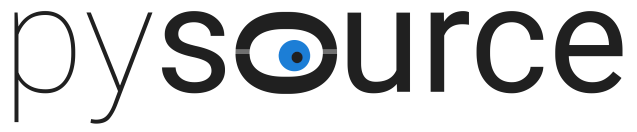

## **1. Installation**

In [1]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 4.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
--2022-02-13 15:32:07--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.08s   

2022-02-13 15:32:08 (14.6 MB/s) - ‘Mask_RCNN_basic_1.zip’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
   creating: Mask_RCNN/
  inflating: Mask_RCNN/.gitignore    
   creating: Mask_RCNN/assets/
   creating: Mask_RCNN/images/
  inflating: Mask_RCNN/LICENSE       
  inflating: Mask_RCNN/MANIFEST.in 

Using TensorFlow backend.


... done downloading pretrained model!


In [ ]:
!nvidia-smi

## **2. Run Mask-RCNN on Images**

You can load here the image and extract the mask using Mask-RCNN


In [2]:
# Load Image
img = cv2.imread("/content/tornavida.jpg")

test_model, inference_config = load_inference_model(1, "/content/mask_rcnn_object_0001.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/mask_rcnn_object_0001.h5



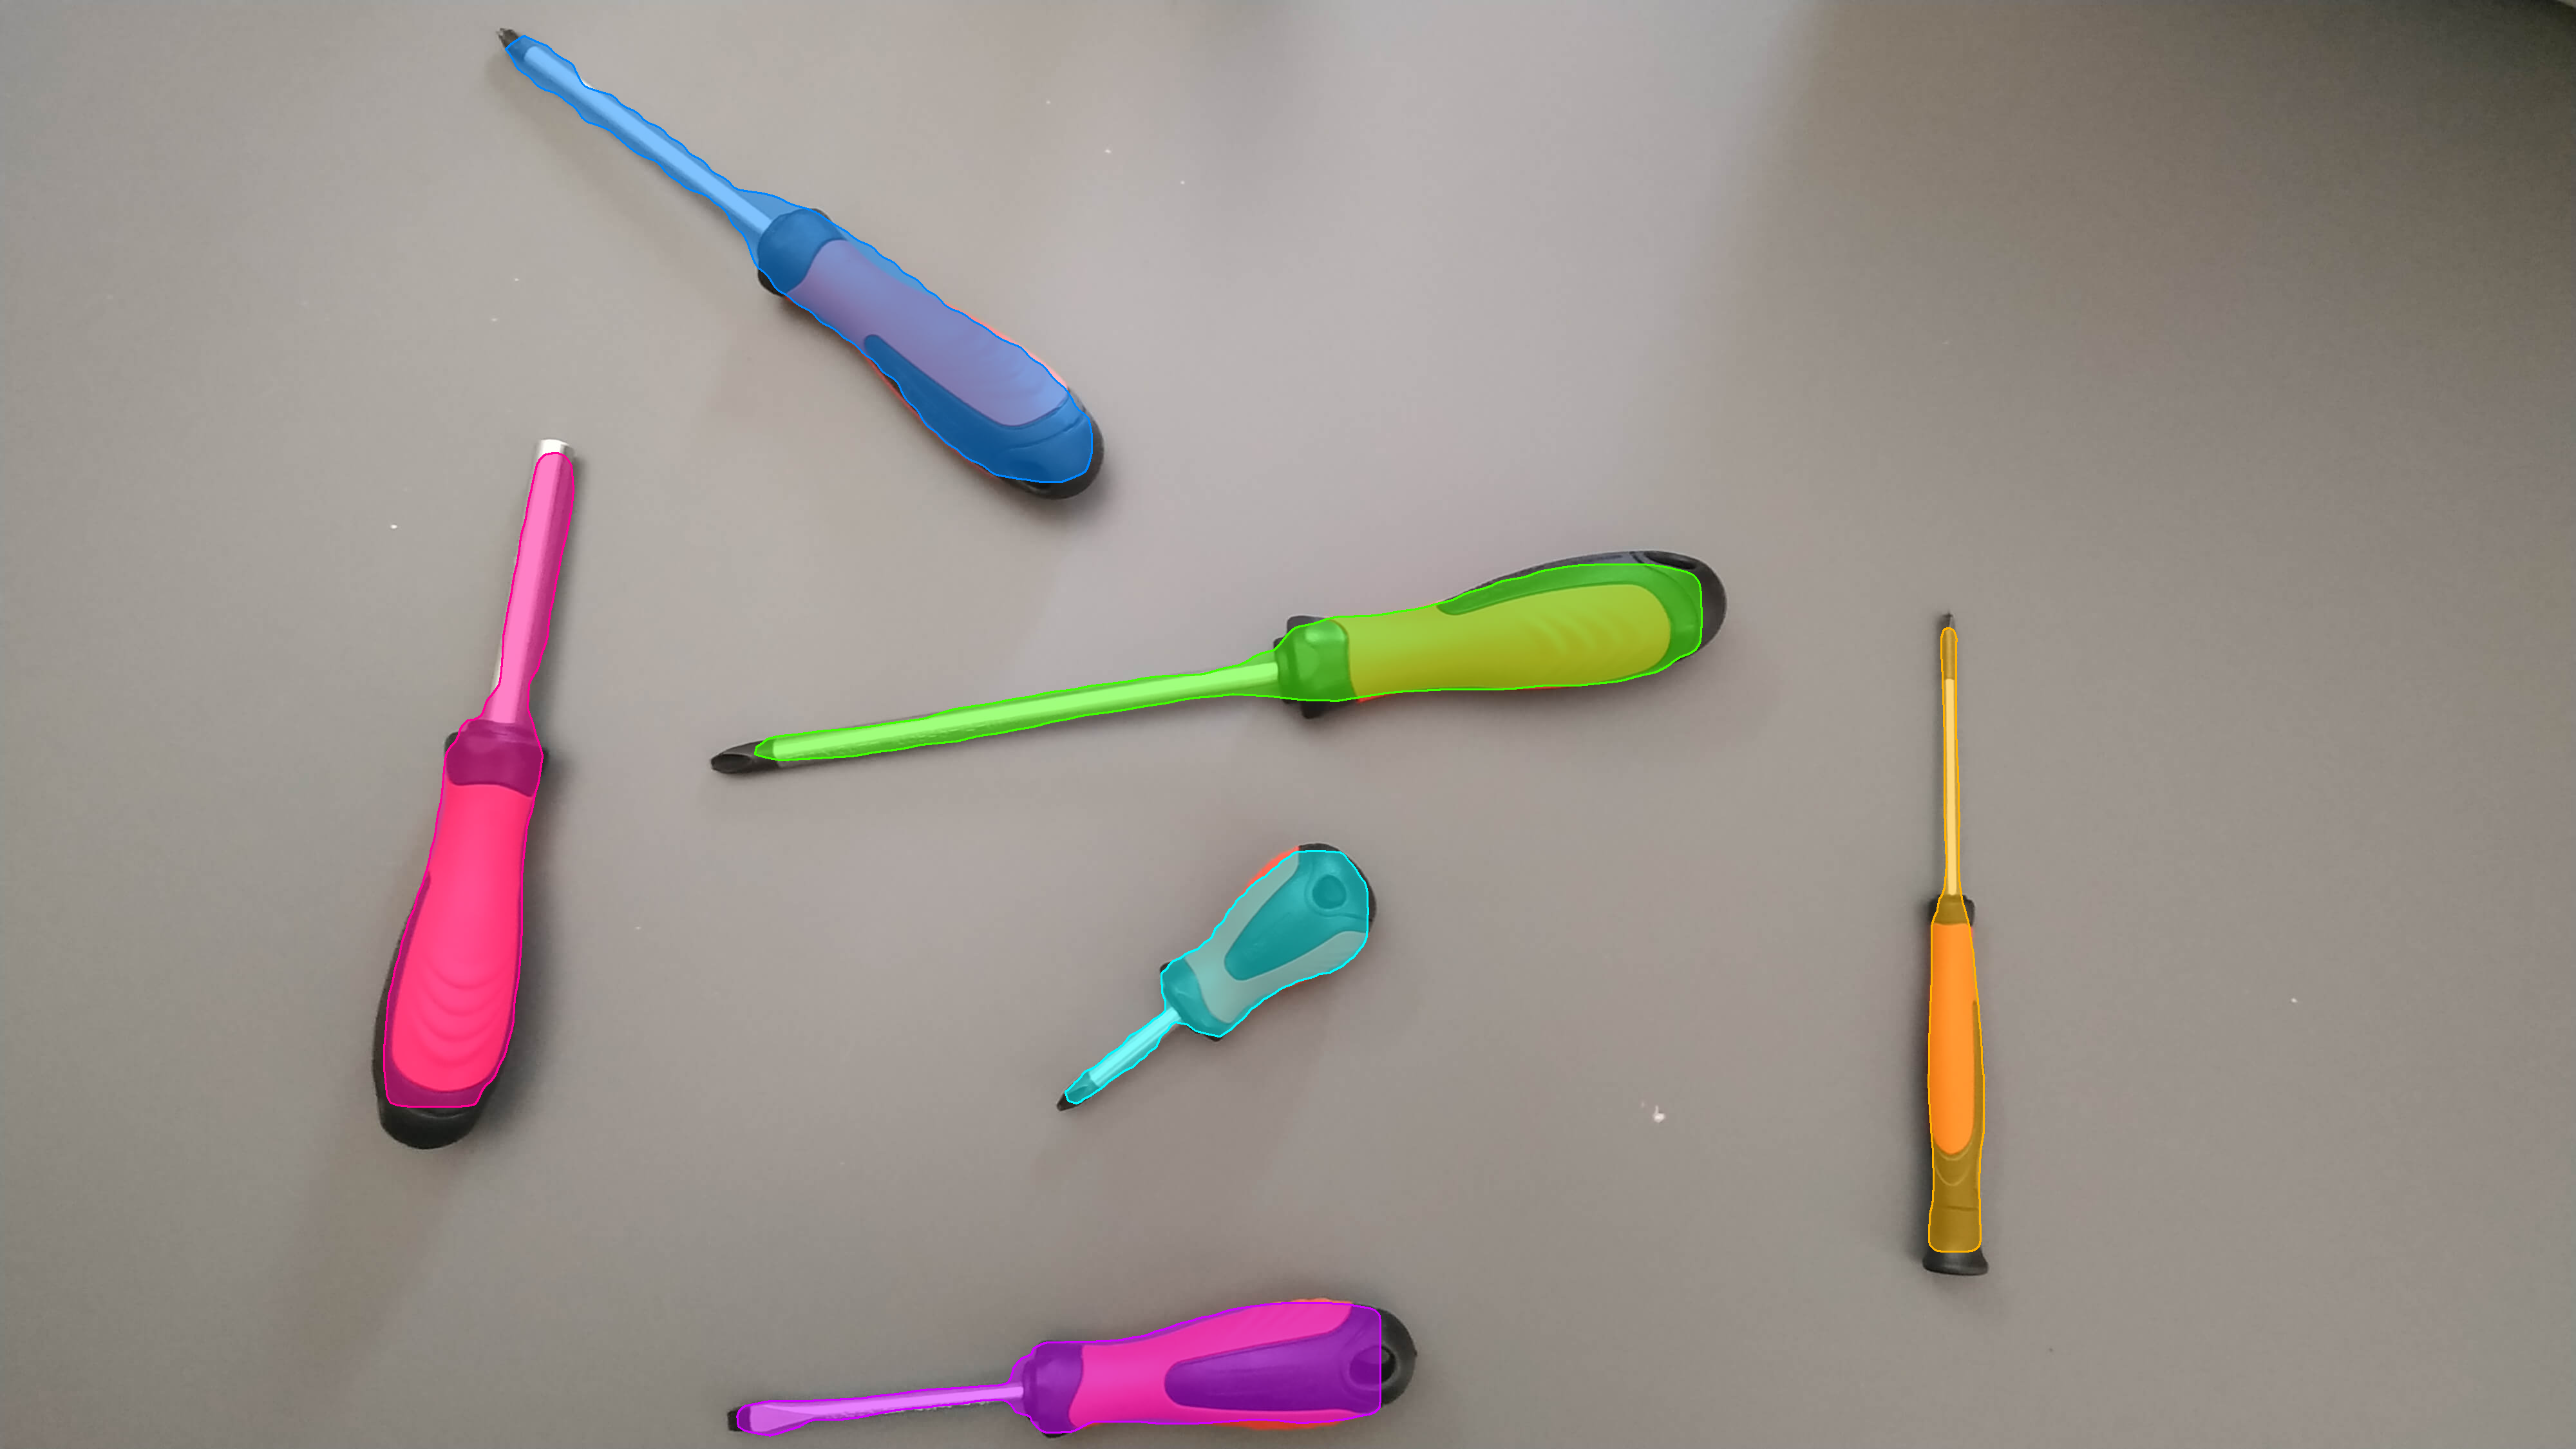

In [3]:
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

cv2_imshow(img)